In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

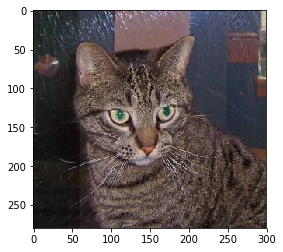

In [2]:
cat = cv.imread('E:\\Data\\Manan\\CNN_DATASET\\dataset\\training_set\\cats\\cat.1.jpg')
cat = cv.cvtColor(cat, cv.COLOR_BGR2RGB)
plt.imshow(cat)
# cat.shape

In [3]:
# we need to define a data generator 
# that will help us transform images (like flipping, rotating, cropping and reshaping)
# this will help the model train better and not overfit
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [4]:
# width shifting is maximum stretching along x-axis (same for height shift)
# rescaling normalizes the pixel values 
img_gen = ImageDataGenerator(rotation_range=45,
                  width_shift_range=0.2,
                  height_shift_range=0.2,
                  shear_range=0.2,
                  zoom_range=0.2,
                  fill_mode='nearest',
                  horizontal_flip=True,
                  rescale=1/255)

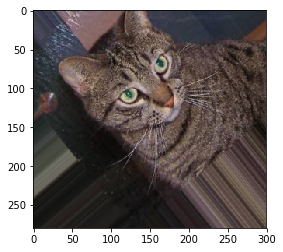

In [5]:
# Gives a random transformation applied each time it is run
plt.imshow(img_gen.random_transform(cat))

In [6]:
# Now we need to build our model
# Dropout helps reduce overfitting by turning random neurons off during training
from keras.models import Sequential
from keras.layers import Activation, Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [13]:
model = Sequential()

# input_shape is the shape of images that will be provided
# we will get the dataset images in this resolution

# we will add multiple convolution and pooling layers
model.add(Conv2D(filters = 64, kernel_size = (3,3), input_shape = (150, 150, 3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(filters = 128, kernel_size = (3,3), input_shape = (150, 150, 3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(filters = 128, kernel_size = (3,3), input_shape = (150, 150, 3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
# using 128 neurons
model.add(Dense(256, activation='relu'))
# model.add(Activation('relu'))

# turn 50% neurons off randomly during training to reduce overfitting
model.add(Dropout(0.5))

# output node
model.add(Dense(1, activation='sigmoid'))
# model.add(Activation('sigmoid'))


model.compile(loss = 'binary_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 128)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       147584    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 36992)             0         
__________

In [15]:
# training a batch of 16 images as a single unit
batch_size = 16

# training data 
training_img_gen = img_gen.flow_from_directory('E:\\Data\\Manan\\CNN_DATASET\\dataset\\training_set',
                                              target_size = (150,150),
                                              batch_size = batch_size,
                                              class_mode= 'binary')

Found 8000 images belonging to 2 classes.


In [16]:
# test data 
test_img_gen = img_gen.flow_from_directory('E:\\Data\\Manan\\CNN_DATASET\\dataset\\test_set',
                                              target_size = (150,150),
                                              batch_size = batch_size,
                                              class_mode= 'binary')

Found 2000 images belonging to 2 classes.


In [17]:
# take a look at image generator 
# its an iterator
training_img_gen

In [18]:
# Means 0 denotes cat and 1 denotes dog
training_img_gen.class_indices

{'cats': 0, 'dogs': 1}

In [19]:
# Because model will take a lot of time to train
# lets see how fast it goes for an epoch
# steps per epoch represents how many batches are to be trained upon in a single epoch
result = model.fit_generator(training_img_gen, epochs = 100, steps_per_epoch = 100,
                             validation_data = test_img_gen, validation_steps = 100)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
100/100 [==============================] - 146s 1s/step - loss: 0.7065 - acc: 0.5187 - val_loss: 0.6933 - val_acc: 0.4925
Epoch 2/100
100/100 [==============================] - 143s 1s/step - loss: 0.6943 - acc: 0.4888 - val_loss: 0.6931 - val_acc: 0.4975
Epoch 3/100
100/100 [==============================] - 143s 1s/step - loss: 0.6915 - acc: 0.5119 - val_loss: 0.6926 - val_acc: 0.5131
Epoch 4/100
100/100 [==============================] - 145s 1s/step - loss: 0.6938 - acc: 0.5225 - val_loss: 0.6937 - val_acc: 0.4925
Epoch 5/100
100/100 [==============================] - 143s 1s/step - loss: 0.6882 - acc: 0.5262 - val_loss: 0.6899 - val_acc: 0.5581
Epoch 6/100
100/100 [==============================] - 143s 1s/step - loss: 0.6894 - acc: 0.5375 - val_loss: 0.6889 - val_acc: 0.5350
Epoch 7/100
100/100 [==============================] - 143s 1s/step - loss: 0.6889 - acc: 0.5281 - val_loss: 0.6854 - val_acc: 0.5631
Epoch 8/100
10

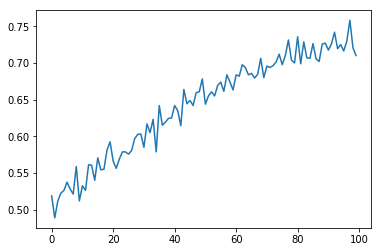

In [58]:
plt.plot(result.history['acc'])

In [21]:
# Using a prebuilt model by trainer
from keras.models import load_model
trainersModel = load_model('DATA/cat_dog_100epochs.h5')

In [59]:
# checking how it performs on new images
dog_file = 'E:\\Data\\Manan\\CNN_DATASET\\dataset\\test_set\\dogs\\dog.4123.jpg'

In [60]:
from keras.preprocessing import image
img = image.load_img(dog_file, target_size = (150,150))
img = image.img_to_array(img)

In [61]:
img  = np.expand_dims(img, axis = 0)
# outputs image as (1, 150, 150, 3)

# normalizing
img = img/255

<h3> Trainers Model </h3>

In [62]:
trainersModel.predict_classes(img)

array([[1]])

In [63]:
# shows prediction accuracy
trainersModel.predict(img)

array([[0.99612075]], dtype=float32)

<h3>My Model </h3>

In [64]:
model.predict_classes(img)

array([[1]])

In [65]:
model.predict(img)

array([[0.8549602]], dtype=float32)

In [57]:
model.save('CatsDogs_71.h5')